<h1>Evaporation of water</h1>

In [19]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('thomas')
import scipy.optimize as op
import astropy.units as u

<h3>Volume of belly</h3>

In [37]:
V = 4*u.l
print(V)

4.0 l


<h3>Modelled as half of rotational ellipsoid, semi-minor axis a is</h3>

In [38]:
a = (3*V/(4*np.pi))**(1/3)
print(a.to(u.cm))

9.847450218426967 cm


<h3>Semi-major axis c is</h3>

In [39]:
c = 2*a
print(c.to(u.cm))

19.694900436853935 cm


<h3>Surface of bottom ellipse</h3>

In [40]:
A_E = np.pi*a*c
print(A_E.to(u.m**2))

0.06092947785379557 m2


<h3>Surface of total rotational ellipsoid</h3>

In [41]:
A_R = 2*np.pi*a*(a + c**2/(np.sqrt(c**2 - a**2))*np.arcsin(np.sqrt(c**2-a**2)/c).value)
print(A_R.to(u.m**2))

0.20828127544624525 m2


<h3>Total inner surface of belly model</h3>

In [25]:
A_tot = A_E + 0.5*A_R

In [42]:
S = A_tot.to(u.m**2)
print(S)

0.1650701155769182 m2


<h3>Empirical constant term for evaporation coefficient</h3>

In [43]:
f = 25*u.kg/u.m**2/u.h
print(f)

25.0 kg / (h m2)


<h3> Empirical linear term for evaporation coefficient (like a density)</h3>

In [44]:
d = 19*u.kg*u.s/u.m**3/u.h
print(d)

19.0 kg s / (h m3)


<h3>Maximum humidity ratio of water in air at 40 C</h3>

In [45]:
x_s = 0.04*u.kg/u.kg
print(x_s)

0.04


<h3>Variable/scalable air streaming in and out (in units of l/min) ...</h3>

In [30]:
L = np.linspace(0,10,1000)*u.l/u.min

<h3>... to get a velocity to, volume rate divided by the cross section of the little tubes in and out (assumed 1 cm^2 here, probably something else</h3>

In [31]:
A_c = 1*u.cm**2

<h3>Air velocities inside belly</h3>

In [32]:
v = L/A_c

<h3>Evaporation of water in units of kg/h, given the above values<?h3>

In [33]:
g = (f+d*v)*S*x_s

<h3>Plot of this

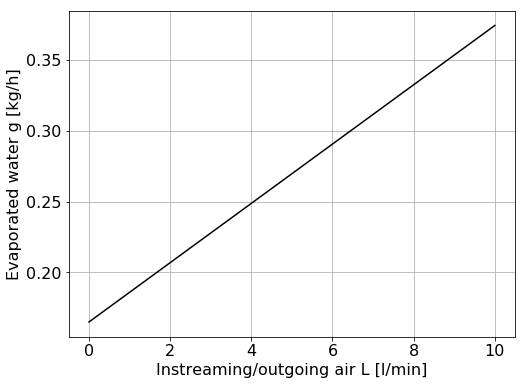

In [36]:
plt.plot(L,g)
plt.xlabel(r'Instreaming/outgoing air L [l/min]')
plt.ylabel(r'Evaporated water g [kg/h]')
plt.grid()

<h3>TS:<br>
    1) I believe, you cannot assume (x - x_s) to be x_s only, because if there is no air streaming into the belly, there should also be no water evaporating.<br>
    2) Likewise, the assumption of the air being completely saturated when leaving the belly is probably not correct.<br>
    3) The empirical formula is very approximate and may not sufficiently well work for closed systems, and non-flat surfaces: if you let air stream in the belly through a small tube, the air will spread and distribute around non-linearly inside, which will have impact the effective air velocity.<br>
    4) There is still some information missing on the experimental design which I assumed in this case, e.g. the cross section of the tubes to let air stream in, or if, when you pump air into it, the thing expands. These approximations could be taken into account...<h3>